## Predictive Modeling for Customer Churn Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn import linear_model  # For using the linear regression model
import matplotlib.pyplot as plt  # For data visualiza

In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis

# Read the CSV file using pandas
data = pd.read_csv("Downloads/Shill Bidding Dataset.csv")

# Display the first few rows of the DataFrame to inspect the data
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:

# Drop the specified columns (Record_ID, Auction_ID, Bidder_ID) from the DataFrame
data.drop(["Record_ID", "Auction_ID", "Bidder_ID"], axis=1, inplace=True)

# Display the first few rows of the DataFrame after dropping the columns
data.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [5]:
# Extract features by dropping the "Class" column
X = data.drop("Class", axis=1)

# Extract the target variable ("Class")
y = data["Class"]

# Split the dataset into training and testing sets
# X_train: Features for training, X_test: Features for testing
# y_train: Target labels for training, y_test: Target labels for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
# Print the sizes of the training and testing datasets
print("Training dataset size: {}, Testing dataset size: {}".format(X_train.shape, X_test.shape))

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


In [7]:
# Import the LinearRegression model from scikit-learn
linear = linear_model.LinearRegression()

# Fit the LinearRegression model using the training data
linear.fit(X_train, y_train)

# The output of the above code will be the model information, which includes various parameters.

# Predict on the first 10 test data points using the trained model
predictions = linear.predict(X_test)[:10]

# Display the predicted values for the first 10 test data points
print("Predicted values using linear regression:", predictions)

Predicted values using linear regression: [-0.00375542 -0.00248633 -0.01090699 -0.02753235  0.01939224  0.99493654
  0.02761226 -0.00565047  0.48101551  0.00471959]


In [8]:
# Obtain the actual target values for the first 10 test data points
actual_values = y_test[:10].values

# Display the actual target values for the first 10 test data points
print("Actual target values:", actual_values)

Actual target values: [0 0 0 0 0 1 0 0 0 0]


In [9]:
# Evaluate the score of the linear regression model on the training and testing datasets

# Calculate and print the score on the training dataset
score_train = linear.score(X_train, y_train)
print("Score on training dataset using linear regression:", score_train)

# Calculate and print the score on the testing dataset
score_test = linear.score(X_test, y_test)
print("Score on testing dataset using linear regression:", score_test)

Score on training dataset using linear regression: 0.8166836356918417
Score on testing dataset using linear regression: 0.8119909602893054


In [10]:

logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train)

# Predict on the test data using the logistic regression model
logit_predictions = logit.predict(X_test)[:10]

# Display the predicted values obtained using logistic regression
print("Predicted values using logistic regression:", logit_predictions)

Predicted values using logistic regression: [0 0 0 0 0 1 0 0 0 0]


In [11]:
# Display the actual target values for the first 10 test data points
actual_values = y_test[:10].values
print("Actual target values:", actual_values)

Actual target values: [0 0 0 0 0 1 0 0 0 0]


In [12]:
# Calculate and print the score on the training dataset using logistic regression
logit_score_train = logit.score(X_train, y_train)
print("Score on training dataset using logistic regression:", logit_score_train)

# Calculate and print the score on the testing dataset using logistic regression
logit_score_test = logit.score(X_test, y_test)
print("Score on testing dataset using logistic regression:", logit_score_test)

Score on training dataset using logistic regression: 0.9794303797468354
Score on testing dataset using logistic regression: 0.9715340010542962


In [13]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For enhanced data visualization

# Read the data from the CSV file into a pandas DataFrame named "data"
data = pd.read_csv('Downloads/Churn_Modelling.csv')

# Display the first five rows of the dataset to get a preview
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [14]:
# Get the number of rows in the dataset using the len() function
num_rows = len(data)

# Get the dimensions of the dataset using the shape attribute
num_rows, num_columns = data.shape

# Display the number of rows in the dataset
print("Number of rows in the dataset:", num_rows)

# Display the dimensions of the dataset (number of rows and columns)
print("Dimensions of the dataset (rows, columns):", num_rows, "rows,", num_columns, "columns")

Number of rows in the dataset: 10000
Dimensions of the dataset (rows, columns): 10000 rows, 12 columns


In [15]:
# Check if the dataset contains any missing values
missing_values_exist = data.isnull().values.any()

# Display whether missing values exist in the dataset
print("Missing values exist:", missing_values_exist)

Missing values exist: True


In [16]:
# Explore columns with missing values
columns_with_missing = data.isnull().any()

# Display which columns have missing values
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool


In [17]:
# Explore summary statistics of specific columns (EstimatedSalary and Age)
specific_columns_summary = data[["EstimatedSalary", "Age"]].describe()

# Display summary statistics of specific columns
print("Summary statistics of EstimatedSalary and Age columns:")
print(specific_columns_summary)

Summary statistics of EstimatedSalary and Age columns:
       EstimatedSalary          Age
count      9996.000000  9994.000000
mean     100074.744083    38.925255
std       57515.774555    10.489248
min          11.580000    18.000000
25%       50974.077500    32.000000
50%      100168.240000    37.000000
75%      149388.247500    44.000000
max      199992.480000    92.000000


In [18]:
# Explore general summary statistics of the dataset
general_summary = data.describe()

# Display general summary statistics of the dataset
print("General summary statistics of the dataset:")
print(general_summary)

General summary statistics of the dataset:
         CustomerId      CredRate          Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  9994.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800    38.925255      5.012800   76485.889288   
std    7.193619e+04     96.653299    10.489248      2.892174   62397.405202   
min    1.556570e+07    350.000000    18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000    32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000    37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000    44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000    92.000000     10.000000  250898.090000   

        Prod Number    HasCrCard        ActMem  EstimatedSalary        Exited  
count  10000.000000  10000.00000  10000.000000      9996.000000  10000.000000  
mean       1.530200      0.70550      0.515100    100074.744083      0.203700  
std  

In [19]:
# Change the data type of the HasCrCard column to "category"
data["HasCrCard"] = data["HasCrCard"].astype("category")
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [20]:
# Calculate the number of missing values for each column
missing_values_count = data.isnull().sum()

# Display the count of missing values for each column
print("Number of missing values for each column:")
print(missing_values_count)

Number of missing values for each column:
CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64


In [21]:
# Calculate the percentage of missing values for each column
missing_values_percentage = round(data.isnull().sum() / len(data) * 100, 2)

# Display the percentage of missing values for each column
missing_values_percentage

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [22]:
# Check the data types of the columns with missing values
missing_columns_data_types = data[["Gender", "Age", "EstimatedSalary"]].dtypes

# Display the data types of the columns with missing values
missing_columns_data_types

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [23]:
# Calculate the mean of the 'EstimatedSalary' column
mean_value = data['EstimatedSalary'].mean()

# Fill in the missing values in the 'EstimatedSalary' column with the calculated mean
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)

In [24]:
# Count the occurrences of each value in the 'Gender' column
gender_value_counts = data['Gender'].value_counts()

# Display the count of each gender category
print("Gender value counts:")
print(gender_value_counts)

# Fill in the missing values in the 'Gender' column with the most common gender value
most_common_gender = gender_value_counts.idxmax()
data['Gender'] = data['Gender'].fillna(most_common_gender)

Gender value counts:
Gender
Male      5453
Female    4543
Name: count, dtype: int64


In [25]:
# Calculate the mode of the 'Age' column
mode_value = data['Age'].mode()

# Display the mode value of the 'Age' column
print("Mode value of Age column:", mode_value[0])

# Fill in the missing values in the 'Age' column with the calculated mode
data['Age'] = data['Age'].fillna(mode_value[0])

Mode value of Age column: 37.0


In [26]:
# Check for the presence of any missing values in the dataset
missing_values_exist = data.isnull().any()

# Display whether missing values exist in each column
print("Missing values exist in each column:")
print(missing_values_exist)

Missing values exist in each column:
CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool


In [27]:
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [28]:
# Rename selected columns using a dictionary of column name changes
data = data.rename(columns={
    'CredRate': 'CreditScore',
    'ActMem': 'IsActiveMember',
    'Prod Number': 'NumOfProducts',
    'Exited': 'Churn'
})

# Display the updated column names after renaming
print("Updated column names:")
print(data.columns)

Updated column names:
Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')


In [29]:
# Display the first five rows of the dataset to get a preview
data.head(5)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [30]:
# Drop the 'CustomerId' column from the dataset
data.drop(labels=['CustomerId'], axis=1, inplace=True)

# Extract the 'Churn' column and drop it from the dataset
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1, inplace=True)

# Insert the 'Churn' column at the end of the dataset
data.insert(len(data.columns), 'Churn', column_churn.values)

# Display the updated column names after repositioning the 'Churn' column
print("Updated column names after repositioning 'Churn' column:")
print(data.columns)

Updated column names after repositioning 'Churn' column:
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')


In [31]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [32]:
# Convert selected columns to the 'category' data type
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"].astype('category')

# Display the data types of all columns after conversion
print("Data types of columns after conversion:")
print(data.dtypes)

Data types of columns after conversion:
CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object


In [33]:
churn_counts = data['Churn'].value_counts()
churn_counts

Churn
0    7963
1    2037
Name: count, dtype: int64

In [34]:
# Calculate the percentage of churned and non-churned customers
percentage_churned = data['Churn'].value_counts(normalize=True) * 100
percentage_churned

Churn
0    79.63
1    20.37
Name: proportion, dtype: float64

In [35]:
# Calculate the percentage of customers with a credit card
percentage_has_cr_card = data['HasCrCard'].value_counts(normalize=True) * 100
percentage_has_cr_card

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

In [36]:
# Display summary statistics of the dataset
data_summary = data.describe()
data_summary

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [39]:
data['Churn'] = pd.Categorical(data['Churn'], categories=['No', 'Yes'], ordered=True)
data['Churn'] = data['Churn'].cat.codes

# Select only numerical columns for aggregation
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Group the data by the 'Churn' column and calculate the mean for each group
summary_churn = data.groupby('Churn')[numerical_columns].mean()

# Display the mean values for each group
print("Mean values for each churn group:")
print(summary_churn)

Mean values for each churn group:
       CreditScore      Age  Tenure       Balance  NumOfProducts  \
Churn                                                              
-1        650.5288  38.9241  5.0128  76485.889288         1.5302   

       EstimatedSalary  
Churn                   
-1       100074.744083  


In [40]:
churn_median = summary_churn.median()

# Display the median values for each churn group
print("Median values for each churn group:")
print(churn_median)

Median values for each churn group:
CreditScore           650.528800
Age                    38.924100
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
EstimatedSalary    100074.744083
dtype: float64


Text(0, 0.5, 'No of Customers')

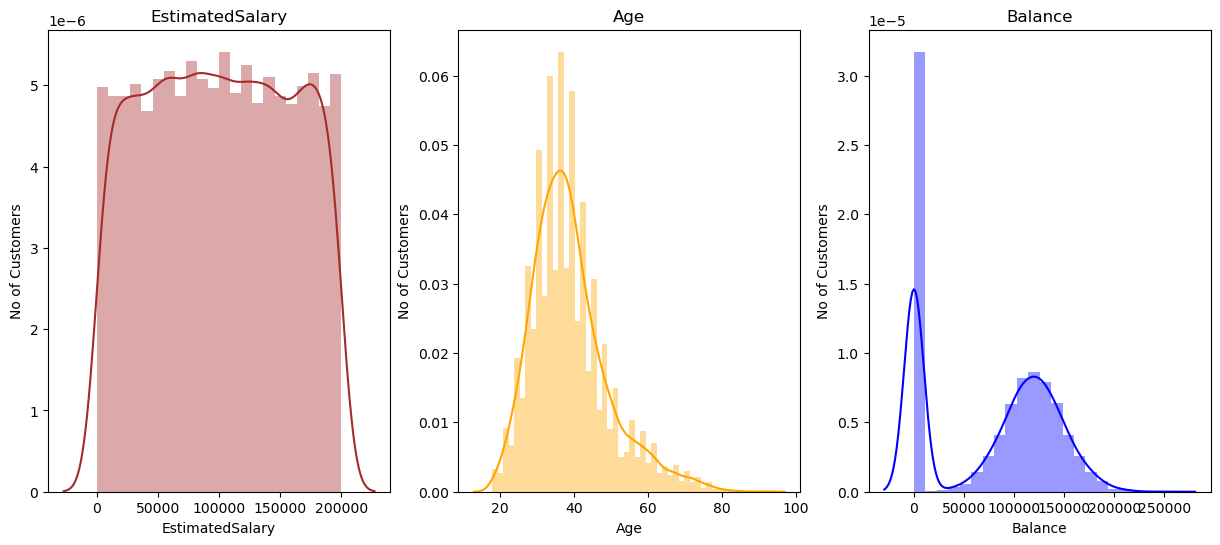

In [42]:
# Create a subplots layout with 3 columns and a defined figure size
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Plot the distribution of 'EstimatedSalary' in the first subplot
sns.distplot(data.EstimatedSalary, kde=True, color="brown", \
             ax=axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

# Plot the distribution of 'Age' in the second subplot
sns.distplot(data.Age, kde=True, color="orange", \
             ax=axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

# Plot the distribution of 'Balance' in the third subplot
sns.distplot(data.Balance, kde=True, color="blue", \
             ax=axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers') 

IndexError: list index out of range

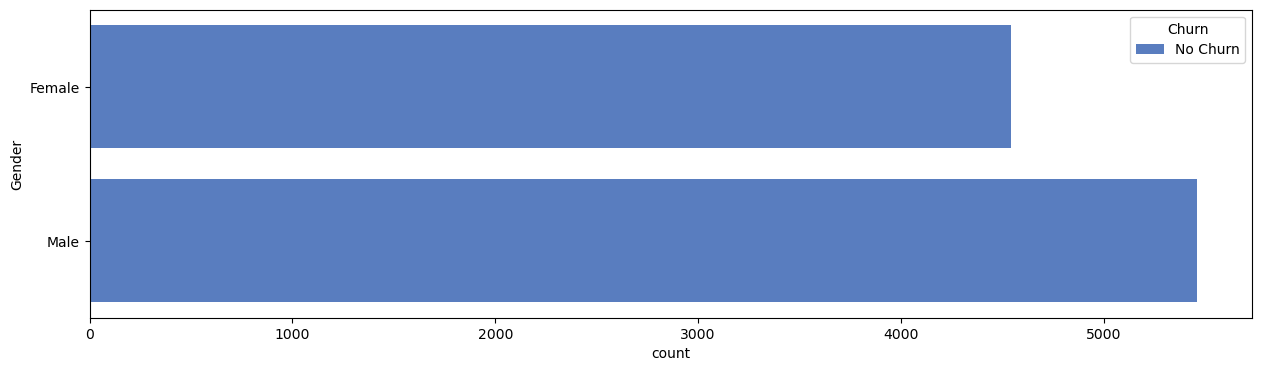

In [43]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by gender
p = sns.countplot(y="Gender", hue='Churn', data=data, \
                  palette="muted") 

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Churn Distribution by Gender') 

IndexError: list index out of range

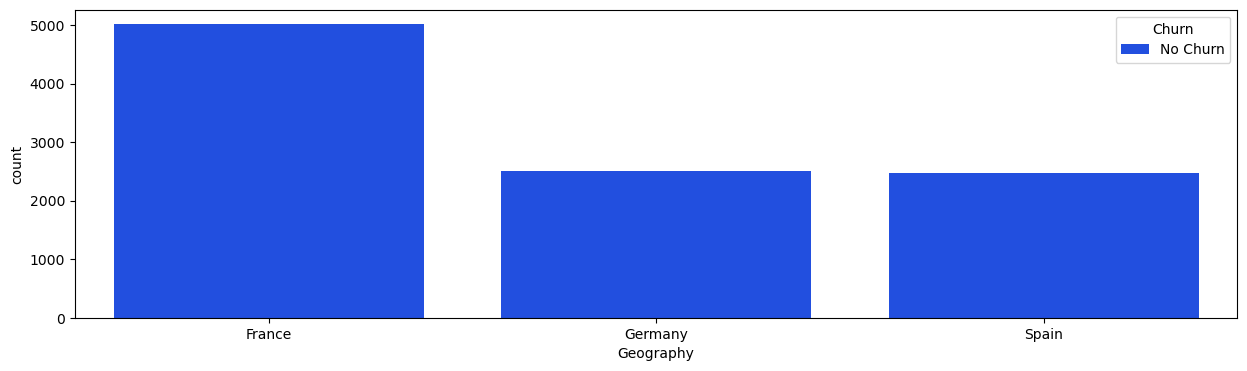

In [44]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by geography
p = sns.countplot(x='Geography', hue='Churn', data=data, \
                  palette="bright") 

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Geography Distribution') 

IndexError: list index out of range

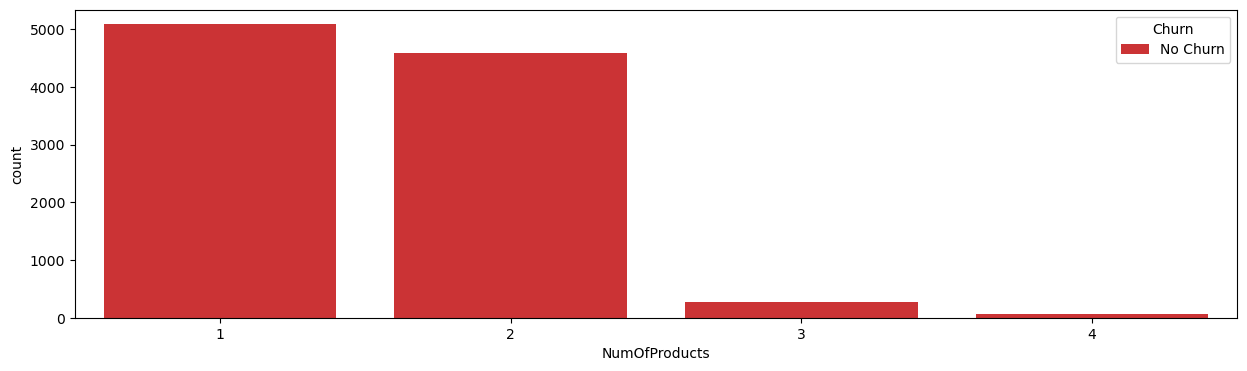

In [45]:
# Set the figure size for the plot
plt.figure(figsize=(15,4)) 

# Create a countplot to visualize churn distribution by number of products
p = sns.countplot(x='NumOfProducts', hue='Churn', data=data, \
                  palette="Set1")  # Using the "Set2" palette

# Get the legend of the plot
legend = p.get_legend() 

# Modify the legend text to represent 'No Churn' and 'Churn'
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 

# Set the title for the plot
p.set_title('Customer Distribution by Product') 